# DATA REPORT - Multivariate Gaussian

In our second data report, we have to work on the same dataset, but this time, we would like to use Multivariate Gaussians for modelling the data (last time we used Categorical Models). This means we have to move from categorical variables to continuous variables.
So again, we will work with the allbus2016 dataset, what is a general report about the population in Germany. We still would like to explore the distributions about political attitude which we will derive from several random variables and compare them to the elections in Germany.

# Data Import and Cleansing

The allbus2016 dataset contains hundreds of variables. We try to choose a valid combination of them and transform them to continuous (if necessary). This time we choose:
 - education ('educ')
 - income ('inc')
 - age ('age')
 - happiness ('ls01')
 - health ('hs01')
 - months abroad ('lt23')
 - spectrum ('pv01')
 
We also have used some of this variables in our Categorical Model, this means they were categoricals. Thus we have to transform some of them to continuous variables.

What is necessary that a categorical variable can be transformed to a continuous? Well, there must be some kind of order on the domain of the categorical variable in order to map them to some kind of scale. Let us check this for one example. We have the variable education ('educ') with entries like "ABITUR" or "MITTLERE REIFE" (in the raw data, we get numericals). Obviously there is an order on the domain, because we can compare the elements. For example "ABITUR" is greater than "MITTLERE REIFE". This can be done with all elements in the domain. The result is a scale what is showing us some level of education. Lucklily we can import the dataset without a mapping from the numericals to categories! And fortunately they are in the right order (can be read in the Codebook). So we only have to remove the values which are not part of the scale. In this example we speak about values like "KEINE ANGABE", what was transformed to '-9'.

Let us have a first look at the data. As I mentioned, we are importing without the mapping to categories. So we get the raw data:

In [1]:
import pandas as pd
df = pd.read_stata('allbus2016/allbus2016.dta', columns=['educ', 'inc', 'age', 'ls01', 'hs01', 'lt23', 'pv01'], convert_categoricals=False)
df.head()

,educ,inc,age,ls01,hs01,lt23,pv01
0,3,1800,47,9,3,-10,6
1,3,2000,52,8,3,-10,3
2,2,2500,61,9,2,-10,1
3,2,860,54,3,4,18,6
4,5,-9,71,9,3,6,-9


We notice that some variables do not have a scale, for example the the variable for spectrum ('pv01'). I generated a scale over the parties from left (1) to right (11) what should display the political spectrum and the position where one participant is located. This scale is certainly not perfect, but should show a vaguely tendency of the political attitude of a single participant. The scale we use:
 - DIE LINKE - 1
 - DIE GRÜNEN - 2
 - SPD - 3
 - PIRATEN - 4
 - FDP - 5
 - CDU/CSU - 6
 - AFD - 9
 - NPD - 11
 
Of course, the political spectrum has surely more dimensions than left-right, but as I said, this mapping can be improved and should only give an approximately impression where a participant is located in the political spectrum. 

I have written a script what is editing the dataset such that we can use it for our exploration. This can be checked in the file Data_Cleansing.ipynb. Let us have a look at the cleaned data:

In [2]:
df = pd.read_csv('data_sets/allbus2016.csv', index_col=0)
df.head()

,educ,inc,age,happiness,health,months_abroad,spectrum
0,3,1800,47,9,3,0,1
1,3,2000,52,8,3,0,5
2,2,2500,61,9,4,0,6
3,2,860,54,3,2,18,1
4,3,2500,49,7,5,0,6


Next to cleansing of the single columns, I also replaced the names of the columns. Now we can have a look at the scatter matrix of our dataset:

<IPython.core.display.Javascript object>


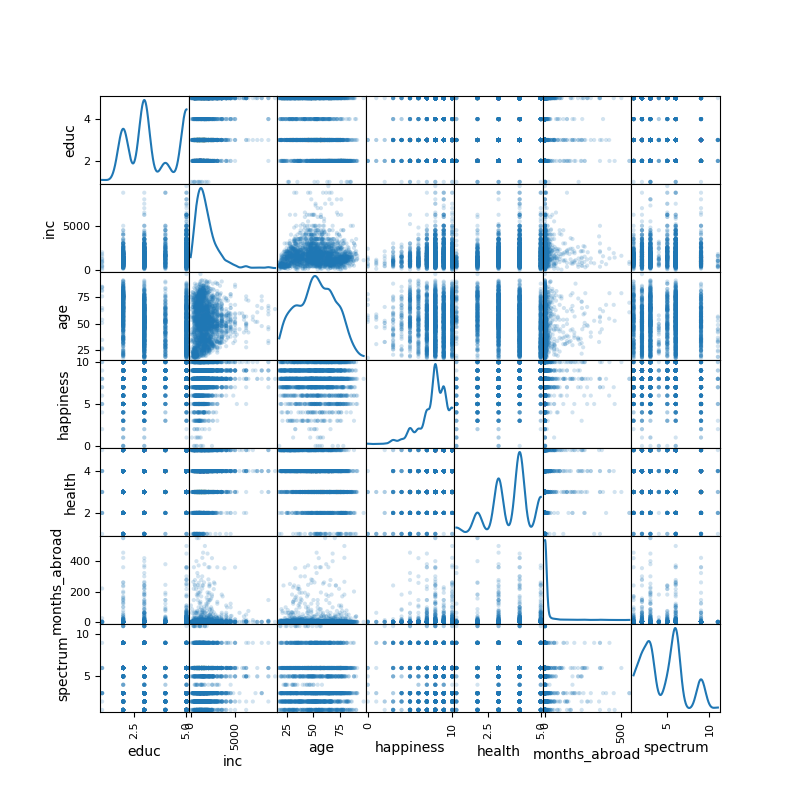

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='kde');

As we can see on the diagonal in the scatter matrix, most of the single variables are not really gaussian distributed. Especially the variables, that were mapped manually to a scale do not fit perfectly in our model. Nevertheless we get a good impression about the data that we are going to fit into a Multivariate Gaussian Model. Also this visualisation will help us to explain some unnormal effects, what our model is going to show us.

# Modelling
After we have imported and cleaned our data we would like to fit them to a Multivariate Gaussian. Therefore we import the nececcary libraries from my written code and create an object from the class "MvG" which stands for Multivariate Gaussian.

The created object only has the class variables "name" and "model". The name is not really important, but is assinged in the beginning. The variable model has the value "None" in the beginning, since we have no model parameters yet, because we have not fitted any data to the model.

In [4]:
from modules.models import *
allb = MvG("allbus2016")

After creating an object, we want to fit the model to the data. For this, we use the function "selection", what uses the Maximum Likelihood (ML) Method. After this, we check our model parameters.

In [5]:
allb.selection("data_sets/allbus2016.csv")
allb.model

[array(['educ', 'inc', 'age', 'happiness', 'health', 'months_abroad',
        'spectrum'], dtype=object),
 array([    3.47412281,  1739.96403509,    52.35877193,     7.82631579,
            3.61359649,    11.1745614 ,     4.44254386]),
 array([[  1.38968125e+00,   4.01263982e+02,  -6.44466336e+00,
           3.08663435e-01,   3.17851839e-01,   1.11241190e+00,
          -4.45785049e-01],
        [  4.01263982e+02,   1.50560846e+06,   6.75056763e+02,
           3.80117876e+02,   1.76765928e+02,   5.68626015e+02,
           1.26351881e+02],
        [ -6.44466336e+00,   6.75056763e+02,   3.03755493e+02,
          -3.74967682e-01,  -5.66970260e+00,   4.18951216e-01,
           5.22806633e-01],
        [  3.08663435e-01,   3.80117876e+02,  -3.74967682e-01,
           3.00667590e+00,   7.01747461e-01,   1.55400277e+00,
          -2.40680979e-01],
        [  3.17851839e-01,   1.76765928e+02,  -5.66970260e+00,
           7.01747461e-01,   9.81832679e-01,  -1.35619037e-01,
          -1.01806517e

The first entry is an list of the names of the variables. The second entry is the mean vector mu and the third entry is the covariance matrix sigma. 

We also can checkout the argmax over the current distribution

In [6]:
allb.argmaximum()

array([    3.47412281,  1739.96403509,    52.35877193,     7.82631579,
           3.61359649,    11.1745614 ,     4.44254386])

So this means that our model tells us, that an average person has an education level of ~3.47, an income of ~1739.96, age of ~52.35, level of happiness of ~7.82, level of health of ~3.61, has been abroad for ~11.17 months and is located at ~4.44 in the political spectrum.

Also the density can be calculated. That means we can checkout the density for a specific vector. For example for the argmax.

In [7]:
allb.density(allb.argmaximum())

3.0034980697941381e-06

This is quite small, what could mean that the gaussian bell is located rather flat over our data.

# Sampling
Before we go on, we would like to get some sample points from our model. This can be done with the implemented function 'sampling'.

In [8]:
sampling500 = allb.sampling(500, save=True)

Saved successfully


Let us have a look at the sampled data:

In [9]:
sampling500.head()

,educ,inc,age,happiness,health,months_abroad,spectrum
0,4.451158,-1190.706235,55.744714,8.269261,3.985988,-79.200344,3.867482
1,1.238483,1783.940906,102.892681,4.786761,3.133855,11.766992,4.837353
2,3.459062,2210.244432,87.049905,7.768155,2.210242,-67.148877,3.638313
3,4.508043,1488.392290,62.809924,4.845853,2.860379,-7.225063,4.420545
4,4.462827,246.257689,45.711179,8.115443,3.754272,-20.792667,1.849273


We also can generate much more sample points:

In [10]:
sampling5000 = allb.sampling(5000, save=True)

Saved successfully


In [11]:
sampling5000.head()

,educ,inc,age,happiness,health,months_abroad,spectrum
0,2.214412,1041.294541,57.398794,8.791499,4.395418,-24.292070,5.257447
1,4.372073,-1112.856077,68.258693,6.500831,2.280215,155.835327,4.390851
2,4.021891,2043.221551,49.077533,7.044077,4.003475,44.957974,1.043560
3,2.436169,1500.461419,80.707581,8.860164,2.131477,-23.741182,4.184431
4,3.338240,2319.103706,45.018281,8.950492,5.025152,-11.577566,4.482416


What did we get? We got sample points, which were drawn from our Multivariate Gaussian distributed model. 

What problems do we have on the first sight? Well, when we check the column 'months_abroad', we notice, that there are values below zero, what does not make sense at all. How comes? Well, let us have a look at the histogram of the sampled data and the original data:

<IPython.core.display.Javascript object>


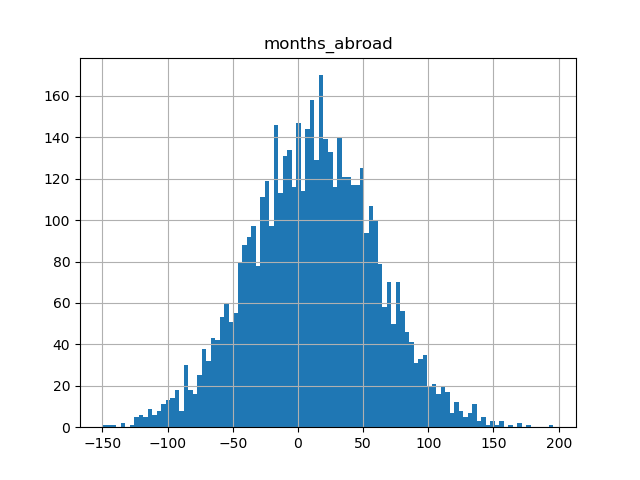

In [12]:
sampling5000.hist('months_abroad', bins=100);

<IPython.core.display.Javascript object>


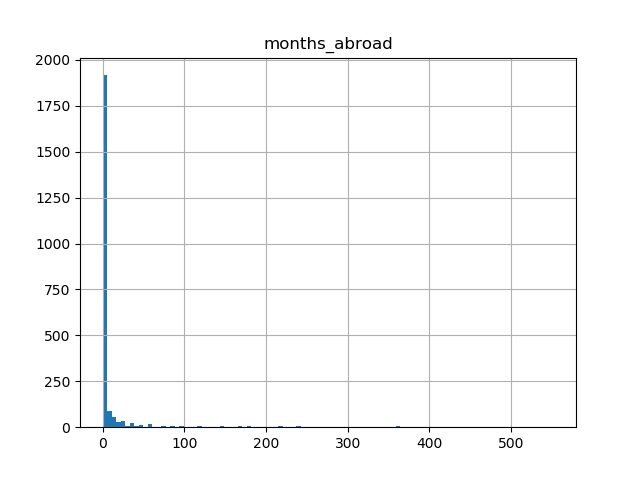

In [19]:
df.hist('months_abroad', bins=100);

We can see the difference. Where the real data has no negative values (obviously), we recognize a gaussian bell in the samples. What is happening? Well, we tried to fit a gaussian bell on our real data with an mean value somewhere near zero. We also got some parameters for sigma. So that is everything what we have in our parameters from the data. When we sample from the model, we get sample points for the model, what contains (with an mean value near zero), also negative values. The conclusion is, that our model does not really fit to the data.

We will talk about this more accurate in the next section, the Model Validation.

# Model Validation

We will seperate our Model Validation in two parts. At first, we would like explore how well our model fits to the data. Afterwards, we will check if our model is calculated correctly (if the algorithms are implemented correctly).

As we also could see in the last section, our dataset is not perfectly gaussian distributed, we can check this on other variables. Let us check the distribution of the date for the variable educ:

At first the sample points:

<IPython.core.display.Javascript object>


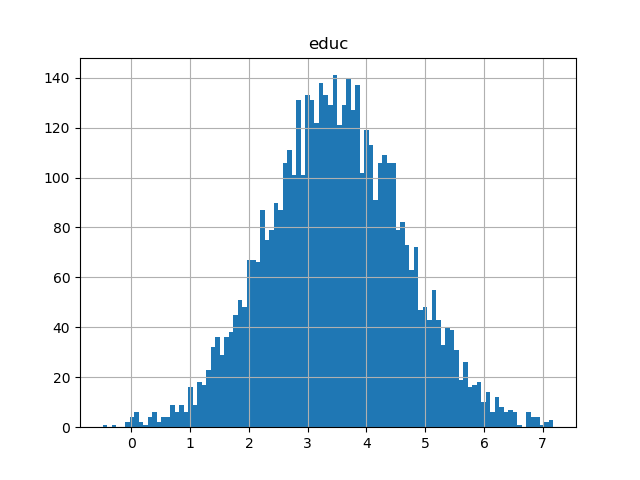

In [13]:
sampling5000.hist('educ', bins=100);

<IPython.core.display.Javascript object>


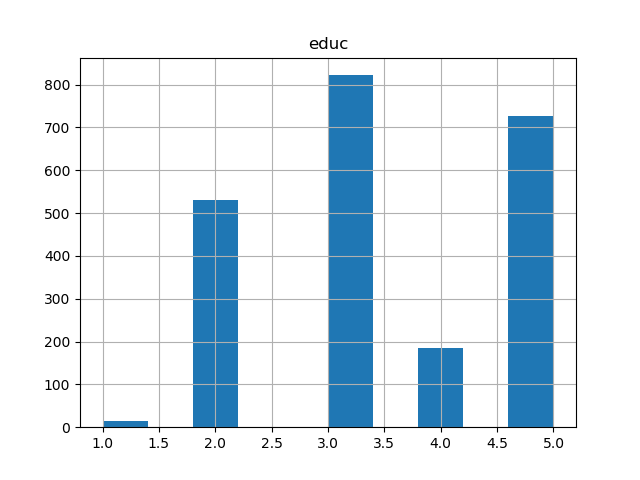

In [78]:
df.hist('educ', bins=10);

The problem is that we transforma a categorical scale to a continuous variable. Of course we get these wholes between the data when we look at the histogram of the original data. It also is not quite gaussian distributed. The sample data is gaussian distributed of course, because the model only have its parameter as information source. 

We also can check a variables what is more likely gaussian distributed. Let us take the political spectrum.

<IPython.core.display.Javascript object>


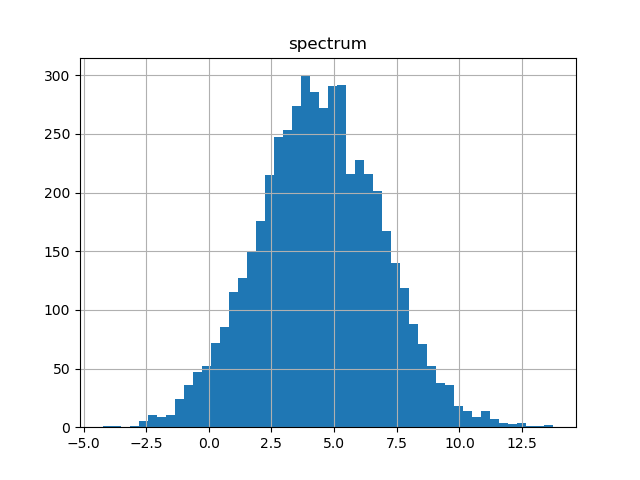

In [14]:
sampling5000.hist('spectrum', bins=50);

<IPython.core.display.Javascript object>


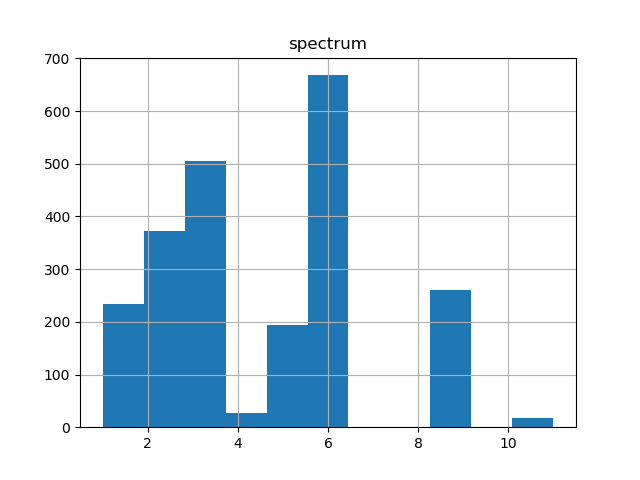

In [81]:
df.hist('spectrum', bins=11);

Again, the sampled data is more likely to be gaussian distributed, whereas the original data has this wholes again. But in this case we can recognize the gaussian bell, we just do not have all values filled, because I wanted to generate the political scale as realistic as possible. That means the distance between the right parties and the middle should fit with the distance to the left parties. 

So we concluded that most of our single variables are not really gaussian distributed, but they are still more or less well represented by the model. This means, we have to be careful with model predictions, because their might be wrong or might not represent the data's content.

In the next part, we would like to concentrate on technical validation of our model. How do we know, that our model was calculated correctly by our written code?

Well, what should we validate? 

- Selection
- Marginalization
- Conditionalization 
- Sampling


We can start with sampling. We just select our model again from sampled data and compare them with the model we sampled from:

In [15]:
allbsampl = MvG("samplallbus2016")
allbsampl.selection("samples/sampling_5000_allbus2016.csv")

In [16]:
allbsampl.model[1] - allb.model[1]

array([  7.35575146e-03,   1.73085519e+01,  -4.59805814e-01,
        -7.08969238e-03,   7.37264112e-03,   1.96662788e-01,
        -5.56992158e-03])

In [17]:
allbsampl.model[2] - allb.model[2]

array([[ -3.86380197e-02,  -4.24308658e+00,  -8.79427109e-02,
          1.49690166e-02,   3.62477130e-03,  -3.53852837e-01,
         -6.27830103e-02],
       [ -4.24308658e+00,  -3.14259365e+04,  -9.77961933e+01,
         -1.61372408e+01,  -1.31611147e+01,  -7.71829662e+02,
          1.33403403e+00],
       [ -8.79427109e-02,  -9.77961933e+01,   7.14695314e+00,
         -5.21224672e-01,  -3.45277349e-01,   1.17907322e+01,
          2.65866302e-01],
       [  1.49690166e-02,  -1.61372408e+01,  -5.21224672e-01,
         -7.80442080e-04,   5.23516491e-03,  -3.86858644e-01,
          3.82695330e-02],
       [  3.62477130e-03,  -1.31611147e+01,  -3.45277349e-01,
          5.23516491e-03,  -1.47637043e-02,   6.64439586e-01,
          1.95954304e-02],
       [ -3.53852837e-01,  -7.71829662e+02,   1.17907322e+01,
         -3.86858644e-01,   6.64439586e-01,   3.67758573e+01,
          1.14712216e+00],
       [ -6.27830103e-02,   1.33403403e+00,   2.65866302e-01,
          3.82695330e-02,   1.95

This looks fine, the difference between the single values are marginal based on the scale of the variables.

Moreover I wrote two simple test methods for Marginalization and Conditionalization with concrete examples. They should return true, if the model is calculating the correct values.

In [18]:
allb.testmarg()

True

In [19]:
allb.testcond()

True

It works.

How can we validate the Model Selection? Well in our cases, it should be enough to check, whether the vizualization shows, if the model fits to the data. To do this in a meaningful way, we should concentrate on variables which are almost gaussian distributed. We will check the plot of the sampled data (what almost should look like the plot of the actual density) and compare it to the plot of the real data.

<IPython.core.display.Javascript object>


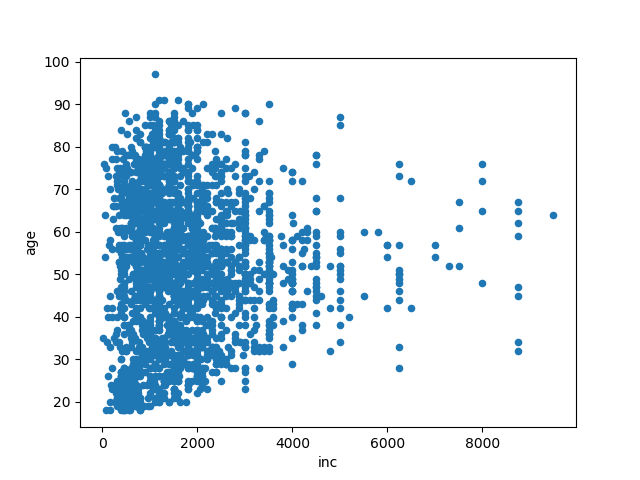

In [20]:
df.plot.scatter("inc", "age");

<IPython.core.display.Javascript object>


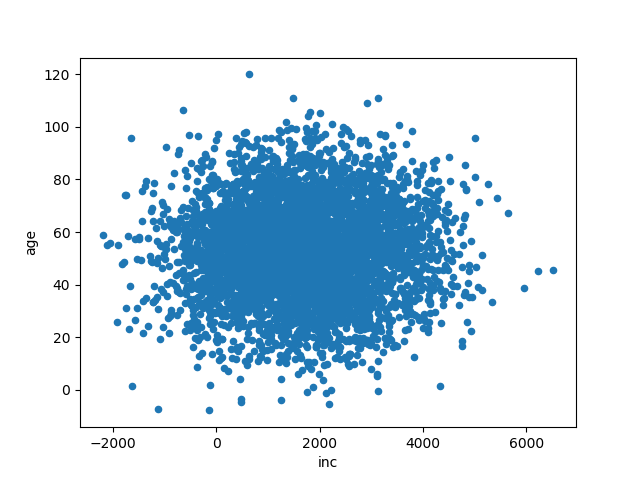

In [113]:
sampling5000.plot.scatter("inc", "age");

Partly we can recognize the gaussian structure in the scatter plot above and which parameters mu and sigma were learned from it. The result is displayed in the plot below, which shows the scatter plot of the sampled data. The model selection tries to fit its given parameters as best as it can. 

The general impression we get is that the model does not fit very well to the data. We will see if the predictions make sense in the next section.

# Prediction

In this section, we would like to use our model and the implemented functions (Marginalization, Conditionalization, Aggregation) to give some possible answers on some hypotheses I thought about.

Questions:
- How do the variables happiness and health correlate? (1) 
- How do the variables months_abroad and spectrum correlate? (2) 
- Have you more likely lived abroad when you located on the right of the political spectrum? (3) 

We will display the density of the models as we did before. We receive the model, sample from it and draw the plots to vizualize some correlations between the variables.

<IPython.core.display.Javascript object>


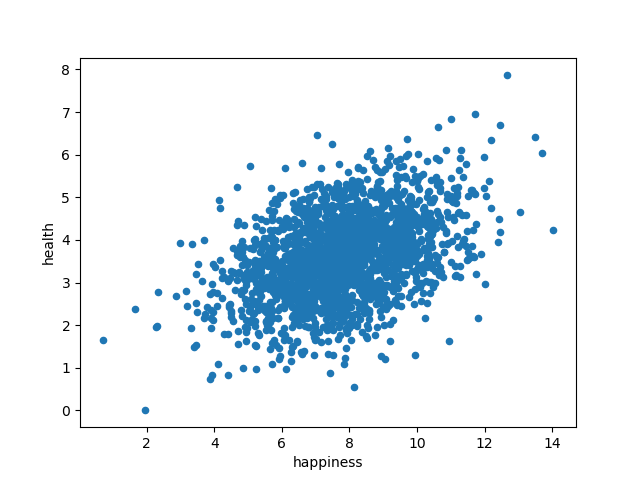

In [21]:
mod1 = allb.marg_list(['educ', 'inc', 'age', 'months_abroad', 'spectrum'])
samplemod1 = mod1.sampling(2000, save=False)
samplemod1.plot.scatter("happiness", "health");

We can see partly a linear correlation between health and happiness what actually make sense. The healthier you are, the happier you should be.

<IPython.core.display.Javascript object>


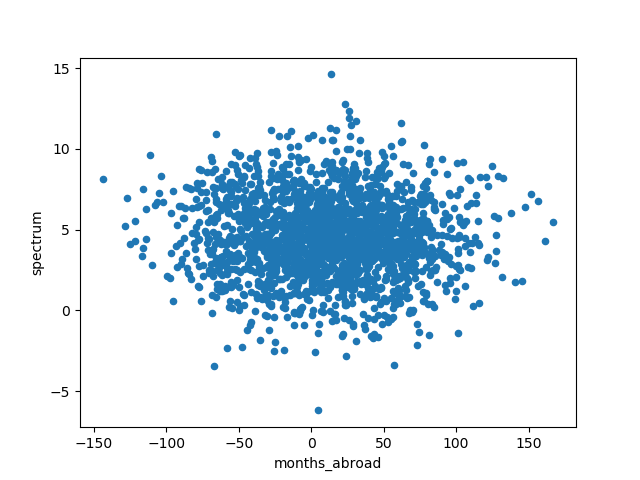

In [22]:
mod2 = allb.marg_list(['educ', 'inc', 'age', 'happiness', 'health' ])
samplemod2 = mod2.sampling(2000, save=False)
samplemod2.plot.scatter("months_abroad", "spectrum");

Also in this example we can see some correlations. People who have lived more months abroad are more likely to be located on the left in the political spectrum, what also makes kind of sense.

To check whether people on the right or on the left in the political spectrum have lived more time abroad, whe have to conditionalize to the single values.

In [23]:
cond21 = mod2.cond('spectrum', 1)
cond21.model

[array(['months_abroad'], dtype=object),
 array([ 12.53317365]),
 array([[ 2305.38134046]])]

In [24]:
cond22 = mod2.cond('spectrum', 11)
cond22.model

[array(['months_abroad'], dtype=object),
 array([ 8.58663789]),
 array([[ 2305.38134046]])]

We have both conditionalized models and can compare their argmaximum.

In [25]:
cond21.argmaximum()[0] > cond22.argmaximum()[0]

True

We were right.

The following questions are just randomly chosen:

- How do income and political spectrum correlate? (4)
- How do age and political spectrum correlate? (5)
- How do age and income correlate? (6)

When you think about the single questions, there should exist some markable correlations, but when we look at the plots, we can not see as much as we want. That's because our model is limited.

<IPython.core.display.Javascript object>


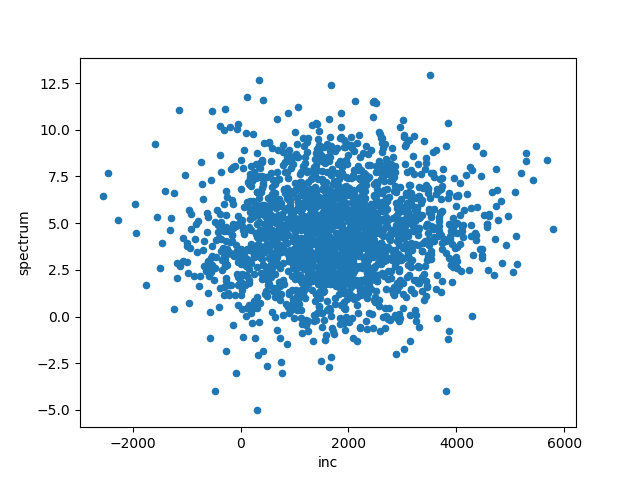

In [26]:
mod4 = allb.marg_list(['educ', 'age', 'happiness', 'health', 'months_abroad'])
samplemod4 = mod4.sampling(2000, save=False)
samplemod4.plot.scatter("inc", "spectrum");

In [122]:
mod4.argmaximum()

array([ 1739.96403509,     4.44254386])

<IPython.core.display.Javascript object>


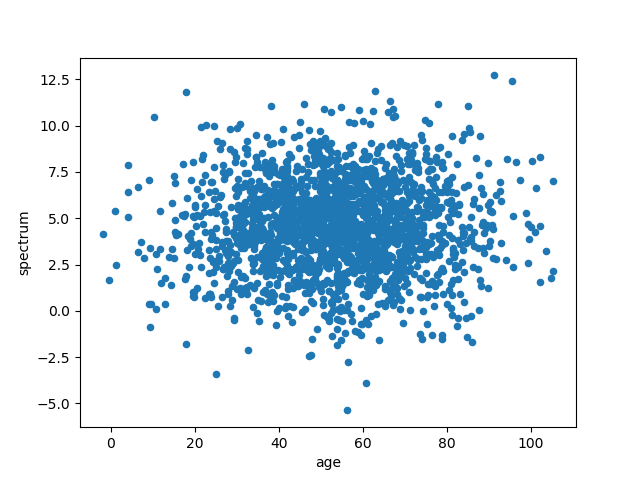

In [27]:
mod5 = allb.marg_list(['educ', 'inc', 'happiness', 'health', 'months_abroad' ])
samplemod5 = mod5.sampling(2000, save=False)
samplemod5.plot.scatter("age", "spectrum");

In [28]:
mod5.argmaximum()

array([ 52.35877193,   4.44254386])

<IPython.core.display.Javascript object>


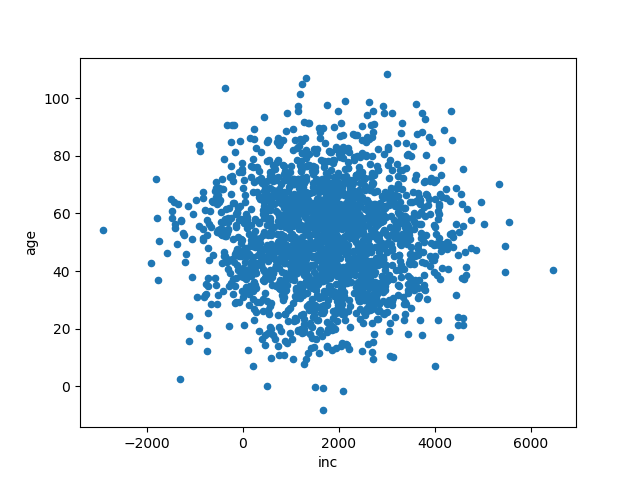

In [29]:
mod6 = allb.marg_list(['educ', 'happiness', 'health', 'months_abroad', 'spectrum' ])
samplemod6 = mod6.sampling(2000, save=False)
samplemod6.plot.scatter('inc', 'age');

In [30]:
mod6.argmaximum()

array([ 1739.96403509,    52.35877193])

For instance, we expect some lineare correlations between age and income, but as we can see in the linear plot, we can not see it. 

# Conclusion

We conclude that not all variables are gaussian distributed. Especially when we want to transform categorical scales to continuous scales, we have some problems with Gaussians. Also when the data is bounded by a number and the mean value is close to that boundary (for example, months_abroad, mean value ~11), we get problems to fit it into a gaussian bell. 

Nevertheless the model complexity is quite low in comparision to the categorical models and we still receive a model what represents the data (more or less). When we keep in mind, that the model does not shows all correlations and connections between the variables, we can still get some meaningful predictions, which can be helpful.